In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Análise exploratória de dados - TITANIC

## Pré-processamento dos dados

### Carregar dados e visualizar dados

In [2]:
titanic = pd.read_csv("../../datasets/raw/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Informações das colunas

In [3]:
columns = titanic.columns.str.lower()
titanic.columns = columns
titanic.rename(columns={'pclass': 'p_class'}, inplace=True)

titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   p_class      891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


### Tratar valores faltantes

In [4]:
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode(), inplace=True)

### Transformar valores da coluna age em classe

In [5]:
titanic['age'] = pd.cut(titanic['age'], [0, 19, 59, 120])
titanic.head()

0      (19, 59]
1      (19, 59]
2      (19, 59]
3      (19, 59]
4      (19, 59]
         ...   
886    (19, 59]
887     (0, 19]
888    (19, 59]
889    (19, 59]
890    (19, 59]
Name: age, Length: 891, dtype: category
Categories (3, interval[int64, right]): [(0, 19] < (19, 59] < (59, 120]]

### Dropar colunas e downcasting dos dados

In [6]:
drop_columns = ['cabin', 'fare', 'ticket', 'name', 'embarked']
titanic.drop(columns=drop_columns, inplace=True)

titanic['survived'] = titanic['survived'].astype("bool")

for column in titanic.columns:
    if titanic[column].dtypes in ['int64'] :
        titanic[column] = titanic[column].astype('int8')
    elif titanic[column].dtypes == 'object':
        titanic[column] = titanic[column].astype('category')
        
titanic.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int8    
 1   survived     891 non-null    bool    
 2   p_class      891 non-null    int8    
 3   sex          891 non-null    category
 4   age          891 non-null    category
 5   sibsp        891 non-null    int8    
 6   parch        891 non-null    int8    
dtypes: bool(1), category(2), int8(4)
memory usage: 6.6 KB


### visualizar dados tratados

In [7]:
titanic.head()

,passengerid,survived,p_class,sex,age,sibsp,parch
0,1,False,3,male,"(19, 59]",1,0
1,2,True,1,female,"(19, 59]",1,0
2,3,True,3,female,"(19, 59]",0,0
3,4,True,1,female,"(19, 59]",1,0
4,5,False,3,male,"(19, 59]",0,0


## Gráficos 

In [8]:
titanic.describe()

,passengerid,p_class,sibsp,parch
count,891.000000,891.000000,891.000000,891.000000
mean,8.127946,2.308642,0.523008,0.381594
std,73.158620,0.836071,1.102743,0.806057
min,-128.000000,1.000000,0.000000,0.000000
25%,-54.000000,2.000000,0.000000,0.000000
50%,15.000000,3.000000,0.000000,0.000000
75%,71.000000,3.000000,1.000000,0.000000
max,127.000000,3.000000,8.000000,6.000000


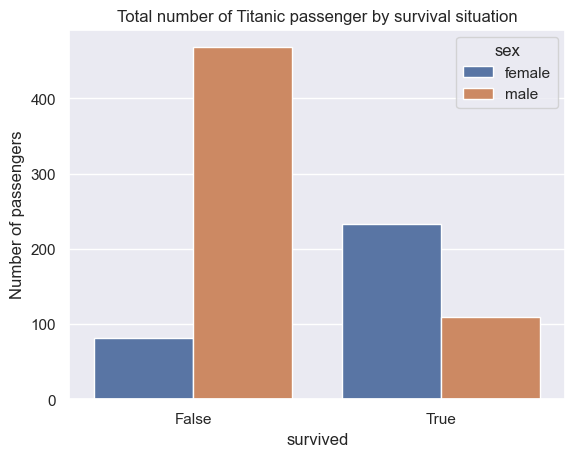

In [9]:
titanic_grouped_sex = titanic.groupby(by=['sex', 'survived'], as_index=False)['age'].count()
titanic_grouped_sex.rename(columns={'age': 'number_passengers'}, inplace=True)

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_sex, x='survived', y='number_passengers', hue='sex')
plt.title("Total number of Titanic passenger by survival situation")
ax.set_ylabel("Number of passengers")
plt.show()

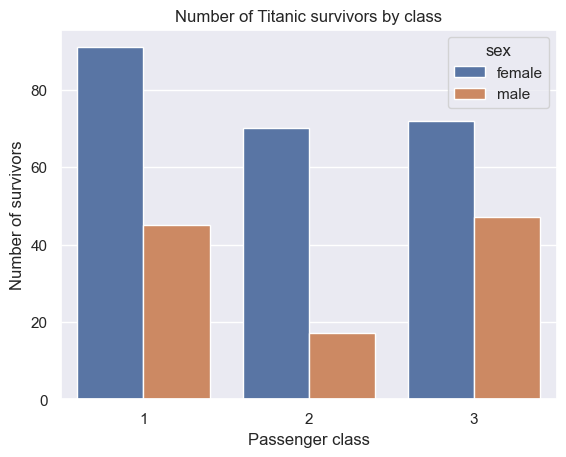

In [10]:
titanic_grouped_class_sex = titanic.groupby(by=['p_class', 'sex', 'survived'], as_index=False)['age'].count()
titanic_grouped_class_sex_1 = titanic_grouped_class_sex[titanic_grouped_class_sex['survived'] == True]
titanic_grouped_class_sex_1 = titanic_grouped_class_sex_1.rename(columns={'age': 'number_survivors'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_class_sex_1, x='p_class', y='number_survivors', hue='sex')
plt.title("Number of Titanic survivors by class")
ax.set_ylabel("Number of survivors")
ax.set_xlabel("Passenger class")
plt.show()

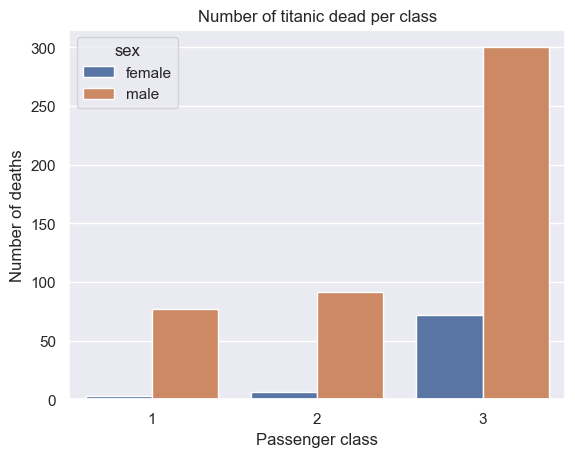

In [11]:
titanic_grouped_class_sex_0 = titanic_grouped_class_sex[titanic_grouped_class_sex['survived'] == False]
titanic_grouped_class_sex_0 = titanic_grouped_class_sex_0.rename(columns={'age': 'number_deaths'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_class_sex_0, x='p_class', y='number_deaths', hue='sex')
plt.title("Number of titanic dead per class")
ax.set_ylabel("Number of deaths")
ax.set_xlabel("Passenger class")
plt.show()

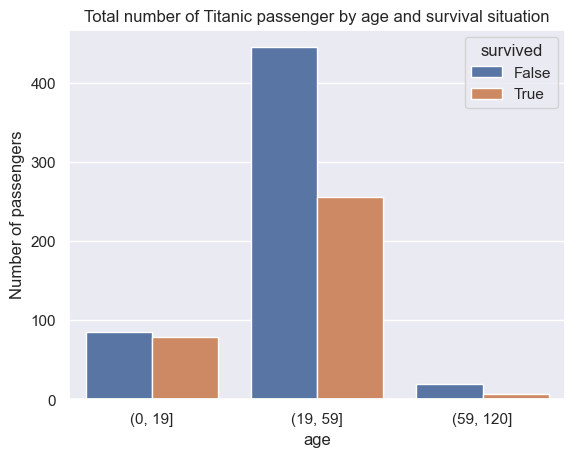

In [12]:
titanic_grouped_age = titanic.groupby(by=['age', 'survived'], as_index=False)['parch'].count()
titanic_grouped_age.rename(columns={'parch': 'number_passengers'}, inplace=True)

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_age, x='age', y='number_passengers', hue='survived')
plt.title("Total number of Titanic passenger by age and survival situation")
ax.set_ylabel("Number of passengers")
plt.show()

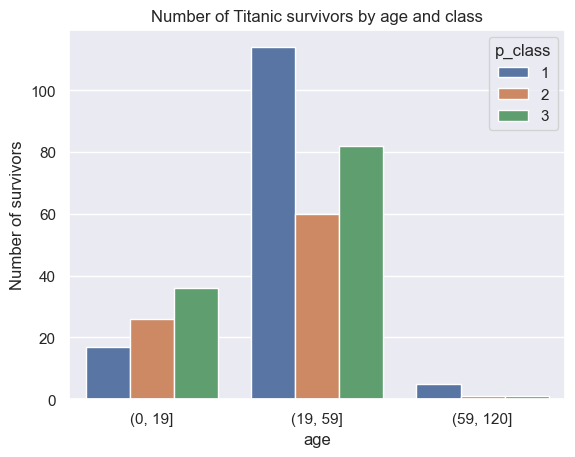

In [13]:
titanic_grouped_class_age = titanic.groupby(by=['p_class', 'age', 'survived'], as_index=False)['sex'].count()
titanic_grouped_class_age = titanic_grouped_class_age[titanic_grouped_class_age['survived'] == True]
titanic_grouped_class_age = titanic_grouped_class_age.rename(columns={'sex': 'number_survivors'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_class_age, x='age', y='number_survivors', hue='p_class')
plt.title("Number of Titanic survivors by age and class")
ax.set_ylabel("Number of survivors")
ax.set_xlabel("age")
plt.show()

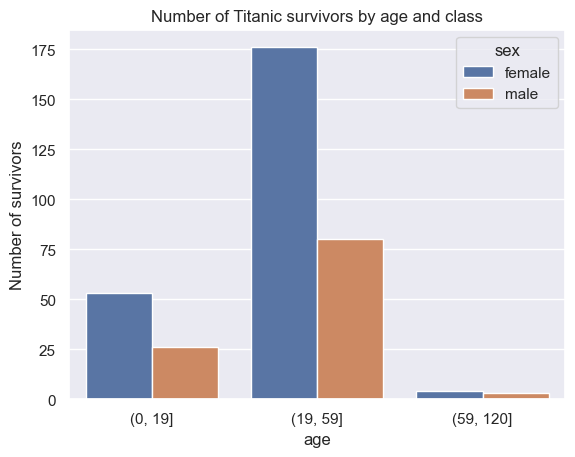

In [14]:
titanic_grouped_sex_age = titanic.groupby(by=['sex', 'age', 'survived'], as_index=False)['p_class'].count()
titanic_grouped_sex_age = titanic_grouped_sex_age[titanic_grouped_sex_age['survived'] == True]
titanic_grouped_sex_age = titanic_grouped_sex_age.rename(columns={'p_class': 'number_survivors'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data=titanic_grouped_sex_age, x='age', y='number_survivors', hue='sex')
plt.title("Number of Titanic survivors by age and class")
ax.set_ylabel("Number of survivors")
ax.set_xlabel("age")
plt.show()

## Salvar dados processados para pickle

In [15]:
titanic.to_pickle("../../datasets/processed/titanic.pkl")